**formula**  
$J(x) = \frac{1}{2m}\sum_{i=1}^{m}(\theta.x_i - y_i)^2$  
$\theta=\theta - \alpha \frac{\delta }{\delta \theta}J(x)$

In [1]:
import matplotlib.pyplot as plt
def plotData(x, y):
    plt.plot(x, y, 'x', color='red', lw=10)
    

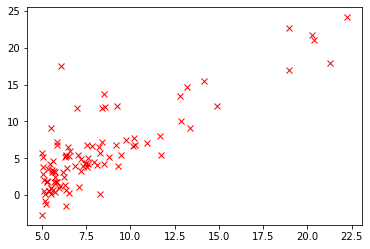

In [2]:
import numpy as np
import os


# ======================= Part 1 Plotting =======================
data = np.loadtxt("ex1data1.txt", delimiter=',')
x = data[:, 0, np.newaxis]
y = data[:, 1, np.newaxis]
plotData(x, y)

In [3]:
def computeCostMulti(X, y,theta):
    m = len(y)
    error = X.dot(theta) - y
    J = 1 / (2*m) * np.sum(error * error)
    return J

In [4]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    S = np.zeros((2, 1), dtype=float)
    k = len(theta)
    m = len(y)
    J_history = np.zeros((num_iters, 1), dtype=int)
    pre_cost = 0
    count_iter = 0
    for iter in range(num_iters):
        error = X.dot(theta) - y
        for i in range(k):
            S[i] = np.sum(error*X[:,i, np.newaxis], axis=0)
        theta = theta - alpha / m * S
        new_cost = computeCostMulti(X, y, theta)
        count_iter+=1
        if abs(pre_cost - new_cost) < 0.000005:
            break
        J_history[iter]= new_cost
        pre_cost = new_cost
    return theta, J_history, count_iter

[[-3.63029144]
 [ 1.16636235]]
1500


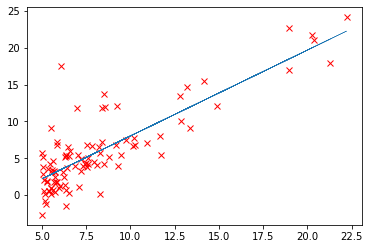

In [5]:
 # =================== Part 2: Cost and Gradient descent ===================
m = len(y)
X = np.concatenate([np.ones((m, 1)), x], axis=1)

theta = np.zeros((2, 1), dtype=int)  # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01
J = computeCostMulti(X, y,  theta)
theta, J_history, count_iter = gradientDescentMulti(X, y, theta, alpha, iterations)
plt.plot(x, y, 'x', color='red', lw=10)
plt.plot(X[:,1], X.dot(theta), '-', lw=0.5)
print(theta)
print(count_iter)

(100, 100)


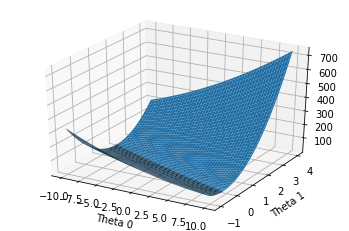

In [6]:
#============= Part 3: Visualizing J(theta_0, theta_1) =============
theta0_vals = np.linspace(-10, 10, 100, endpoint=True)
theta1_vals = np.linspace(-1, 4, 100, endpoint=True)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

print(J_vals.shape)
data = np.loadtxt("ex1data1.txt", delimiter=',')
x = data[:, 0, np.newaxis]
X = np.concatenate([np.ones((m, 1)), x], axis=1)
y = data[:, 1, np.newaxis]

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCostMulti(X, y, t)
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(theta0_vals, theta1_vals)
Z = J_vals.transpose()
ax.plot_surface(X, Y, Z)
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.show()

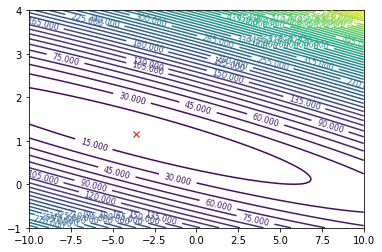

In [7]:
contours = plt.contour(X, Y, Z, origin='lower', levels=50)
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(theta[0], theta[1], 'rx', lw=2)